<img src="https://www.rochester.edu/assets/images/ur-logo.svg">

# <center>[CSC 249/449: Machine Vision](https://www.cs.rochester.edu/~cxu22/t/249S22/)</center>


1. Make sure you fill in all cells contain `YOUR CODE HERE` or `YOUR ANSWER HERE`.
2. After you finished, `Restart the kernel & run` all cell in order.
---------


# Neural Network
----
This notebook will help you get hand on how to implement neural networks to solve two fundamental problems:
1. NN for Regression
    - Implement a Neural Network to fit custom function
2. NN for Classification
    - Implement a Neural Network to classify datapoints
    
You will use a open source machine learning framework **pytorch** to implement the solutions. Please visit https://pytorch.org/tutorials/ for more details.


In [1]:
# import packages
from csc249 import *
import cv2
import numpy as np
import torch
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## NN for Regression

In this task, you will need to complete the following steps:

1. Prepare the data for regession
    * generate a bunch of data to fit the function
2. Define your neural network
3. Train your network and check the results

### 1. Perpare dataset (5 points)

- We define the custom function as follow, $\epsilon$ is the random noise from uniform distribution, and we only deal with $x$ in $[-10,10]$
$$
y=0.05 \cdot x^2+cos(x)+0.2\cdot \epsilon\\
x \in [-10,10] ,\epsilon \sim \mathcal{U}[0,1)\
$$

- Generate data $x$ and $y$ (5 ponits):
    * x: torch.tensor with torch.Size([1000, 1]) equally sampled from [-10,10]
    * y: torch.tensor with torch.Size([1000, 1]) corresponding function value of x


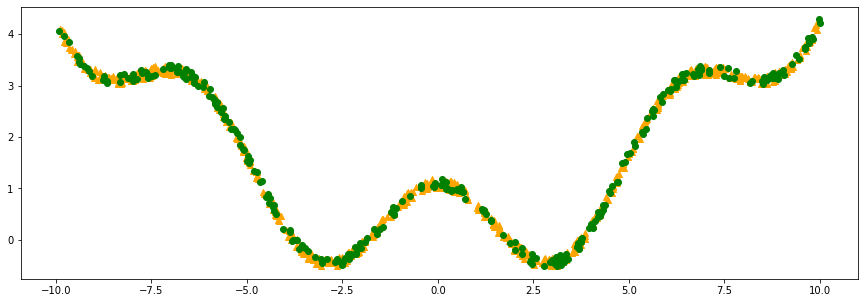

In [2]:
f = lambda x: 0.05*x.pow(2)+torch.cos(x)

# reproducible
torch.manual_seed(1)   

# generate x and y
# YOUR CODE HERE
x = 20 * torch.rand(1000, 1) - 10
epsi = 0.2 * torch.rand(1000, 1)
y = f(x) + epsi
#raise NotImplementedError()


# we'll spilt 70% for training and 30% for validating the performance
# the follow code display the split of dataset, orange for training and green for validation
dataset=[(i,j) for i,j in zip(x,y)]
train_set, val_set = torch.utils.data.random_split(dataset, [int(0.7*len(x)),int(0.3*len(x))])
plt.figure(figsize=(15,5))
plt.scatter(tensor2numpy(train_set,0),tensor2numpy(train_set,1),marker='^',color = "orange")
plt.scatter(tensor2numpy(val_set,0),tensor2numpy(val_set,1),marker='o',color = "green")
plt.show()

### 2. Define network (10 points)
- Define the network layers, i.e., the parameters (7 points):
    - Three-layer MLP with $n$ hidden units (n_feature $\rightarrow$ n_hidden $\rightarrow$ n_hidden $\rightarrow$ n_output). 
    - Use function `LeakyReLU()` to add non-linearity. Think of where to add this activation function.
- Define the network forward pass function, i.e., compute output tensors from input tensors (3 points).
- Please visist https://pytorch.org/docs/stable/nn.html for reference

In [3]:

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # YOUR CODE HERE
        self.input_dim = n_feature
        self.relu = torch.nn.LeakyReLU()
        self.fc1 = torch.nn.Linear(n_feature, n_hidden)
        self.fc2 = torch.nn.Linear(n_hidden, n_hidden)
        self.fc3 = torch.nn.Linear(n_hidden, n_output)
        #raise NotImplementedError()

    def forward(self, x):
        # YOUR CODE HERE
        x1 = self.fc1(x)
        a1 = self.relu(x1)
        x2 = self.fc2(a1)
        a2 = self.relu(x2)
        x3 = self.fc3(a2)
        #y = self.relu(x3)
        y = x3
        #raise NotImplementedError()
        return y


### 3. Training and evaluation (15 points)
For training, we will first define out network, loss function and optimizer, calculate the loss wrt the ground-truth and backprop the loss to optimize the network.

You'll need to implement:
    
- Create a network, and choose a good criterion to train your network. (3 points)
    - For the criterion, think of $L1$ or $L2$ loss.
- The training process(1000 iterations) and display the loss of each iteration (sum of all datapoint for 1 iteration) afterwards. (10 points)
    - During the training process, display the prediction on validation dataset every 50 iterations with following code.
```python
    plt.figure(figsize=(10,4))
    plt.scatter(x.data.numpy(), y.data.numpy(), color = "green")
    plt.scatter(x.data.numpy(), prediction.data.numpy(), color = "blue")
    plt.title('Regression Analysis')
    plt.show()
```
- Display the learning curve with the stored loss values. (2 points)

You can consult the following example https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

  0%|          | 0/1000 [00:00<?, ?it/s]

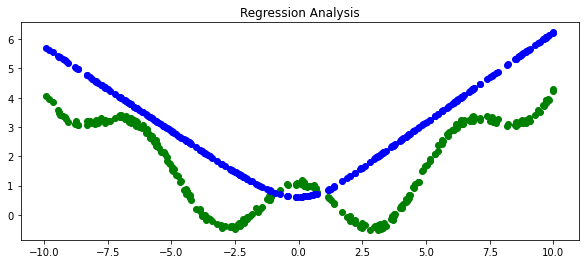

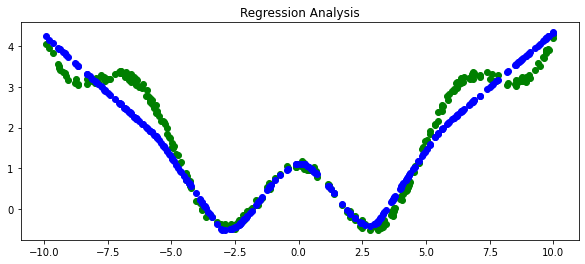

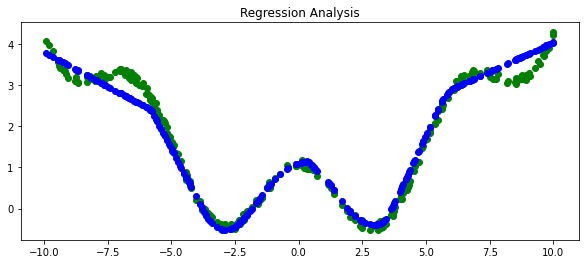

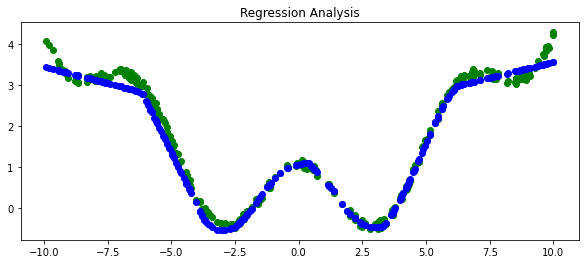

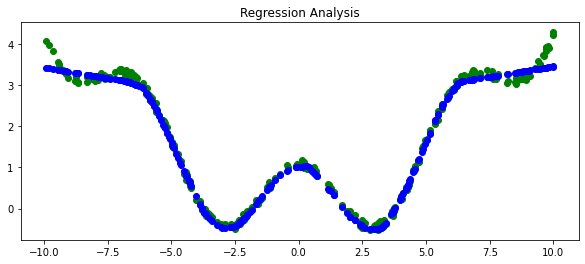

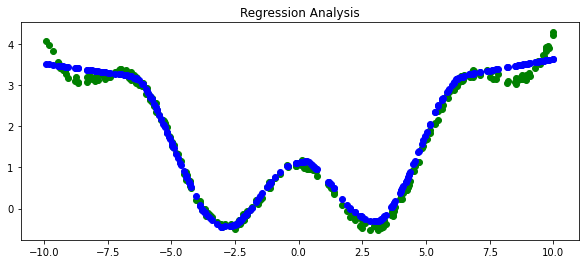

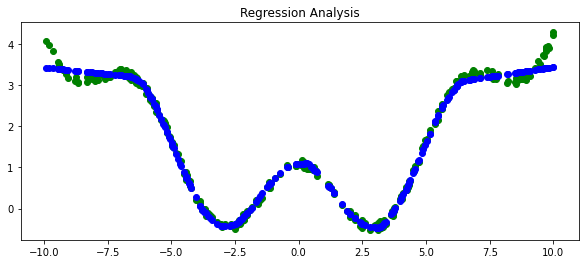

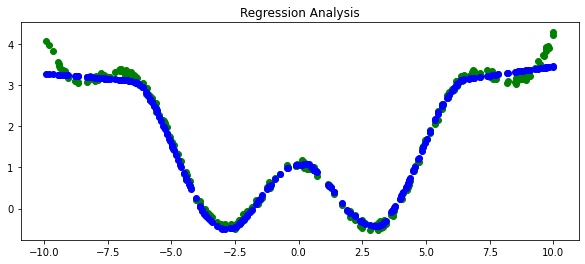

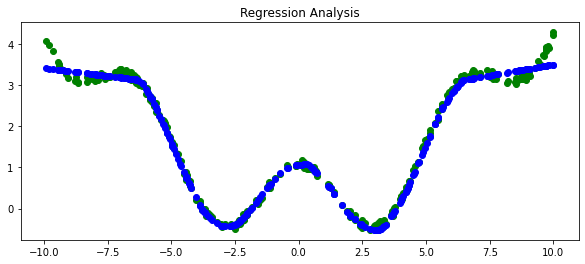

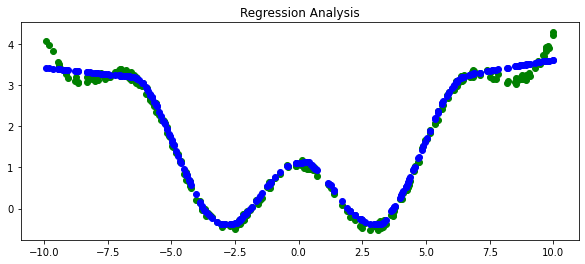

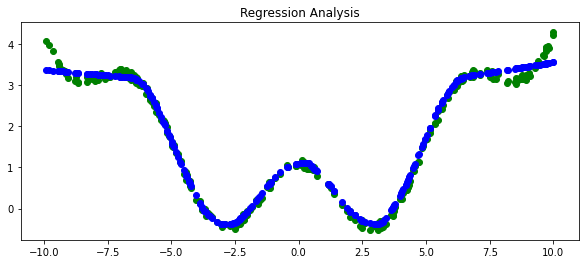

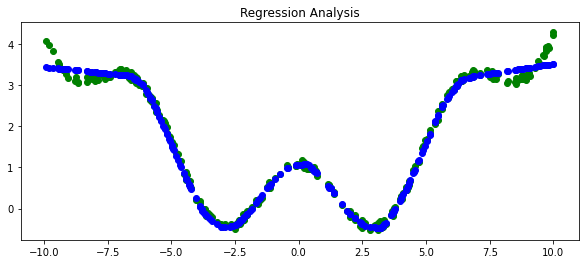

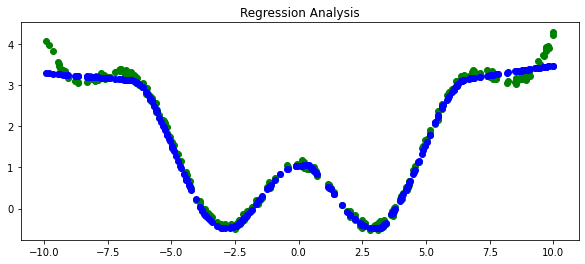

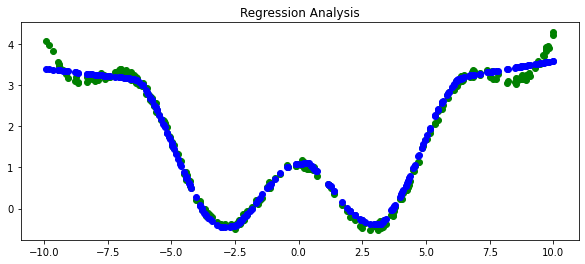

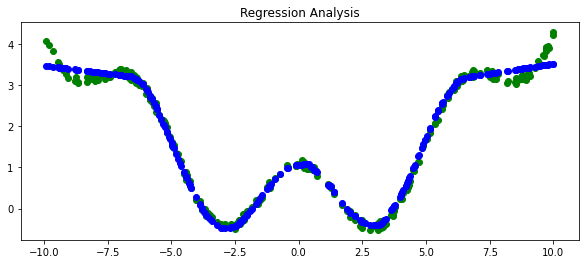

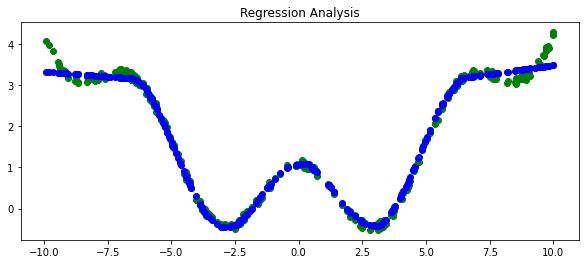

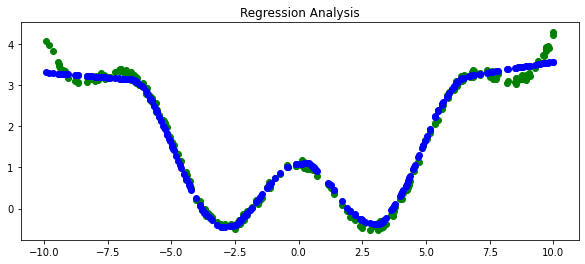

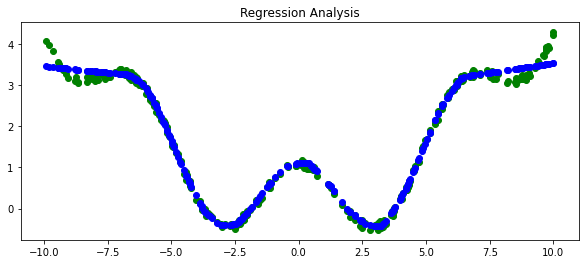

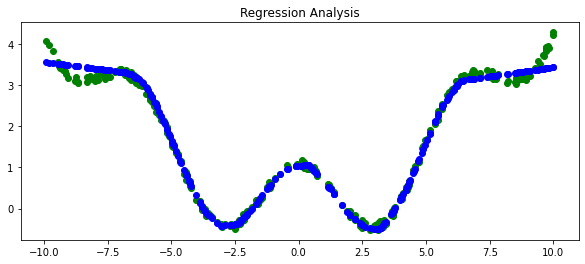

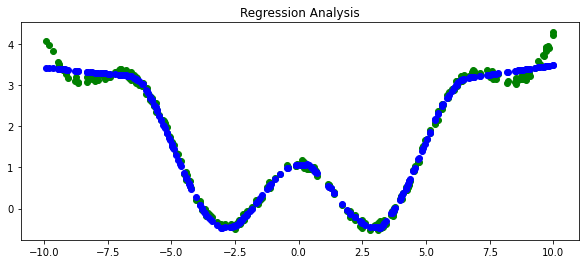

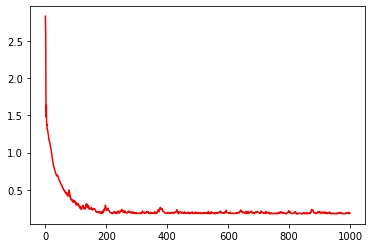

In [5]:
import torch.utils.data as Data
train_loader = Data.DataLoader(dataset=train_set, batch_size=350, shuffle=True, num_workers=2,)
val_loader=Data.DataLoader(dataset=val_set, batch_size=300, shuffle=True, num_workers=2,)

net = None
criterion = None

# Concretely define the above two components (net and criterion)
# YOUR CODE HERE
num_of_hidden = 100          #change number of hidden layers here
net = Net(1, num_of_hidden, 1)  
criterion = torch.nn.L1Loss()
#raise NotImplementedError()
optimizer = torch.optim.Adam(net.parameters(), lr=5e-3)

# train the network
from tqdm.notebook import tqdm
losses=[]
for i in tqdm(range(1000)):
# Your training loop
# YOUR CODE HERE
    loser = 0
    for step, (train_feat, train_lab) in enumerate(train_loader):
        optimizer.zero_grad()
        train_out = net(train_feat)
        loss = criterion(train_out, train_lab)
        loss.backward()
        optimizer.step()
        loser += loss.item()
    losses.append(loser)
    if (i % 50 == 0):
        with torch.no_grad():
            for step, (valid_feat, valid_lab) in enumerate(val_loader):
                x = valid_feat
                prediction = net(valid_feat)
                y = valid_lab
                plt.figure(figsize=(10,4))
                plt.scatter(x.data.numpy(), y.data.numpy(), color = "green")
                plt.scatter(x.data.numpy(), prediction.data.numpy(), color = "blue")
                plt.title('Regression Analysis')
                plt.show()
#raise NotImplementedError()

# display the loss
plt.figure()
X = np.array(range(1000))
Y = np.array(losses)
plt.plot(X, Y, color="red")
plt.show()
# YOUR CODE HERE

#raise NotImplementedError()


## NN for Classification

Similarily, you will also need to complete the following steps:

1. Prepare the data for classification
    * generate two classes of data points
2. Define your neural network
3. Train your network and check the results

### 1. Perpare dataset 



/tmp/ipykernel_17607/4193601150.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


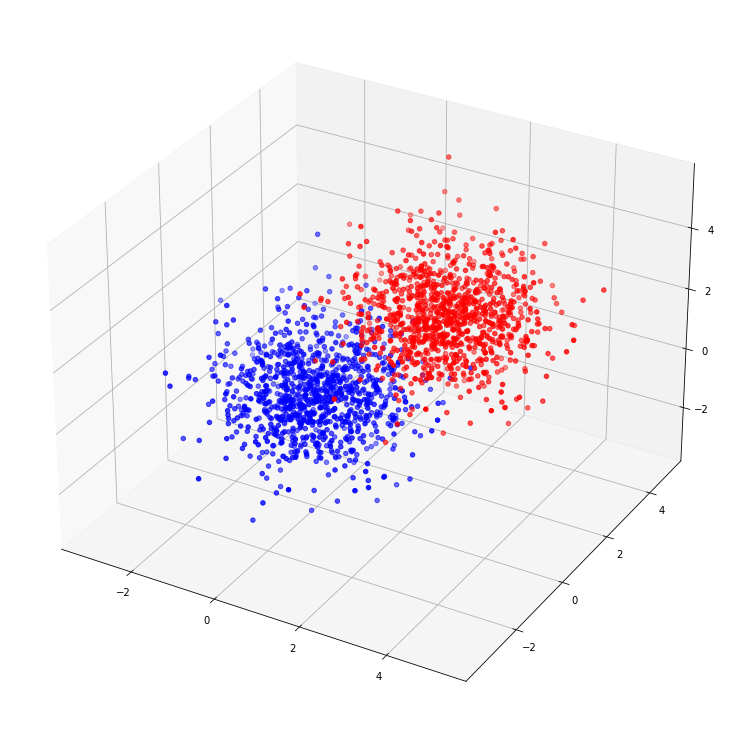

In [6]:
# define two classes of data x0 and x1, and the corresonding labels y0 and y1
x0,y0 = torch.randn(1000, 20), torch.zeros(1000, 1)
x1,y1 = x0+2,torch.ones(1000, 1)
x = torch.cat([x0, x1], dim=0)
y = torch.cat([y0, y1], dim=0)

# display the dataset
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.scatter(x0[:, 0], x0[:, 1], x0[:, 2],color='b')
ax.scatter(x1[:, 0], x1[:, 1], x1[:, 2],color='r')
plt.show()

# we'll spilt 70% for training and 30% for validating the performance
train_set, val_set = torch.utils.data.random_split([(i,j) for i,j in zip(x,y)], [int(0.7*len(x)),int(0.3*len(x))])
train_loader = Data.DataLoader(dataset=train_set, batch_size=350, shuffle=True, num_workers=2,)
val_loader=Data.DataLoader(dataset=val_set, batch_size=300, shuffle=True, num_workers=2,)

### 2. Define network (10 points)
Similar to the regression task:
- Define the network layers, i.e., the parameters (7 points):
    - Three-layer MLP with $n$ hidden units (n_feature $\rightarrow$ n_hidden $\rightarrow$ n_hidden $\rightarrow$ n_output). 
    - Use function `LeakyReLU()` to add non-linearity. 
- Define the network forward pass function, i.e., compute output tensors from input tensors (3 points).

What's different here:
- Remember choose the right activation function for the output since you are predicting the class number

In [10]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
    # YOUR CODE HERE
        self.input_dim = n_feature
        self.relu = torch.nn.LeakyReLU()
        self.sig = torch.nn.Sigmoid()
        self.fc1 = torch.nn.Linear(n_feature, n_hidden)
        self.fc2 = torch.nn.Linear(n_hidden, n_hidden)
        self.fc3 = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x1 = self.fc1(x)
        a1 = self.relu(x1)
        x2 = self.fc2(a1)
        a2 = self.relu(x2)
        x3 = self.fc3(a2)
        y = self.sig(x3)
        return y
    #raise NotImplementedError()

### 3. Training (10 points)

For training, same as above, we will first define our network, loss function and optimizer, calculate the loss wrt the ground-truth and backprop the loss to optimize the network.

You'll need to implement:

- Create a network. 
- The training process(10 iterations) and display the loss of each iteration(sum of all datapoint for 1 iteration) afterwards. 

Noet that this type of dataset is hard to display the visual result, so we only output loss value this time.

In [11]:
net = None
# YOUR CODE HERE
num_of_hidden2 = 16          #change number of hidden layers here
net = Net(20, num_of_hidden2, 1) 
#raise NotImplementedError()
optimizer = torch.optim.Adam(net.parameters(), lr=5e-3)
criterion = torch.nn.BCELoss()

# train the network
losses=[]
for i in tqdm(range(10)):
# Your trianing loop
# YOUR CODE HERE
    loser = 0
    for step, (train_feat, train_lab) in enumerate(train_loader):
        optimizer.zero_grad()
        train_out = net(train_feat)
        loss = criterion(train_out, train_lab)
        loss.backward()
        optimizer.step()
        loser += loss.item()
    losses.append(loser)
#raise NotImplementedError()

# display the loss
# YOUR CODE HERE
# In case you want to plot the loss.
"""
plt.figure()
X = np.array(range(10))
Y = np.array(losses)
plt.plot(X, Y, color="red")
plt.show()
"""
print(losses)
#raise NotImplementedError()

  0%|          | 0/10 [00:00<?, ?it/s]

[2.4118319153785706, 1.9567877650260925, 1.6293336749076843, 1.4498786628246307, 1.3050247132778168, 1.1310836672782898, 0.9489393830299377, 0.7723239660263062, 0.5937044769525528, 0.4339180588722229]


### 4. Evaluation (3 points)
calculate the accuracy (%) of the prediction on validation set (ideally it should be better than 99%)

In [12]:
# calculate the overall accuracy
# YOUR CODE HERE
with torch.no_grad():
    num_of_data = 0
    num_of_agree = 0
    for step, (valid_feat, valid_lab) in enumerate(val_loader):
        x = valid_feat
        prediction = net(valid_feat)
        y = valid_lab
        for lab, pred in zip(y, prediction):
            if (pred >= 0.5) and (lab == 1):
                num_of_agree += 1
            elif (pred < 0.5) and (lab == 0):
                num_of_agree += 1
            num_of_data += 1
    accuracy = num_of_agree / num_of_data
    print(accuracy)
#raise NotImplementedError()

0.9983333333333333


# Submission

1. At the menubar, click `Kernel`$\rightarrow$ `Restart & Run All`
2. Download the zip file and upload via blackboard
   
1% deduction of late assignment total score per hour passing the deadline.

In [9]:
import csc249
csc249.make_submission()

Archived: /home/anon/httpd/htdocs/users/ugrads/plam6/PS3/Neural Network-1.ipynb
Archived: /home/anon/httpd/htdocs/users/ugrads/plam6/PS3/CNN-2.ipynb
Please summit this file at /home/anon/httpd/htdocs/users/ugrads/plam6/PS3/plam6.zip
